In [1]:
import user_steps as us

On packet:10000
On packet:20000
On packet:30000
On packet:40000
On packet:50000
On packet:60000
On packet:70000
On packet:80000
On packet:90000
On packet:100000

 class balance normal to abnormal in the original data
(0.8109343231799444, 0.1890656768200556)

 class balance normal to abnormal in the produced data
(0.038461538461538464, 0.9615384615384616)


Tuning DecisionTree


Tuning KNN


Tuning SVC


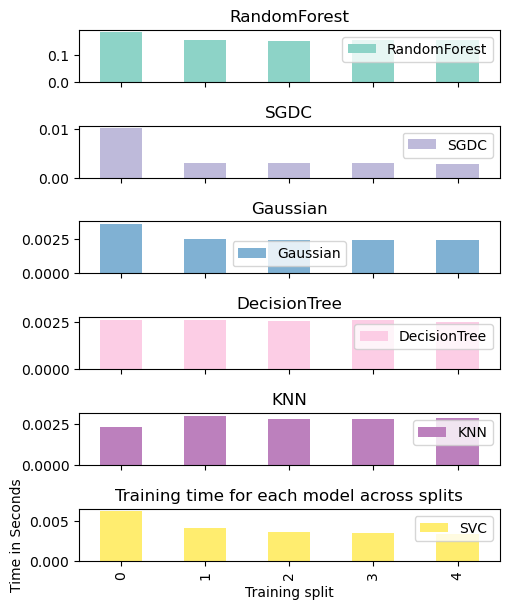

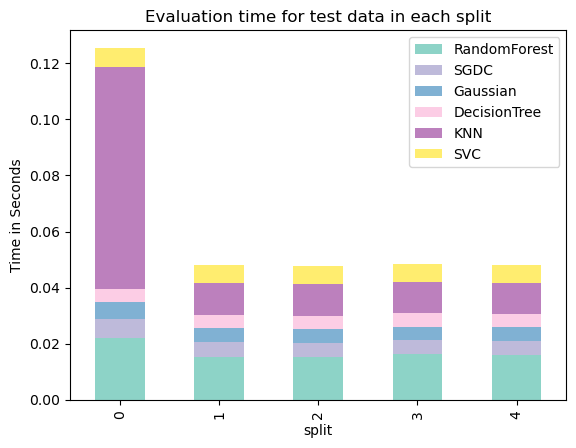

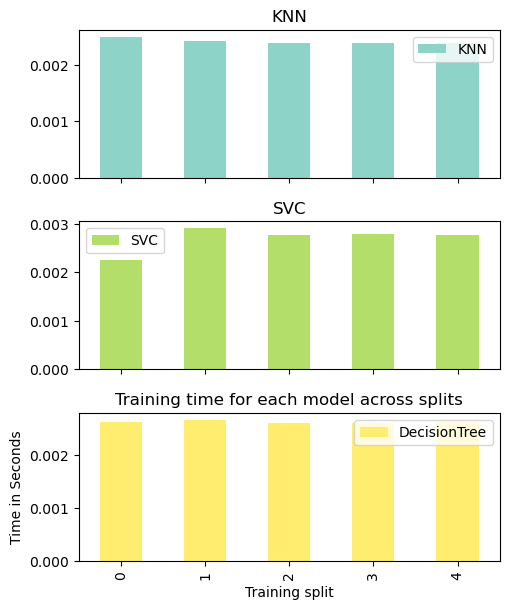

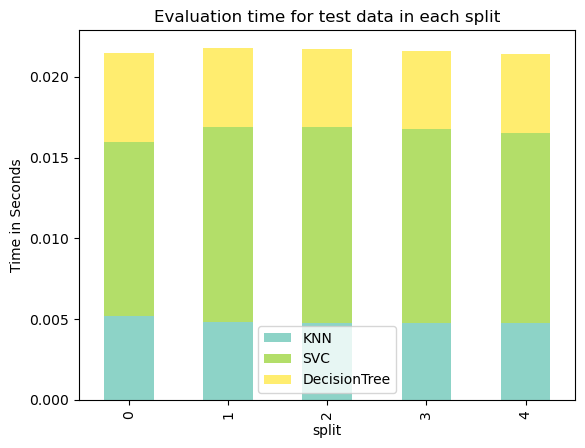

In [2]:
tn, tr, on, opr = us.fullToLive('data/initial_tests/CaptureW64.pcapng', 'data/initial_tests/CaptureW64TARGETS.txt')

In [3]:
fits = []
eval_time = []
bal_acc = []
f1 = []
prec = []
recall = []

for i in range(len(tr)):
	fits.append(tr[i]['fit_time'])
	eval_time.append(tr[i]['score_time'])
	bal_acc.append(tr[i]['test_balanced_accuracy'])
	f1.append(tr[i]['test_f1'])
	prec.append(tr[i]['test_precision'])
	recall.append(tr[i]['test_recall'])
	


In [4]:
tr

[{'fit_time': array([0.18527508, 0.15606022, 0.15364575, 0.15660596, 0.1560812 ]),
  'score_time': array([0.02211094, 0.01539588, 0.01538396, 0.01628494, 0.01603079]),
  'test_balanced_accuracy': array([1. , 1. , 0.5, 1. , 0.5]),
  'test_f1': array([1.        , 1.        , 0.97560976, 1.        , 0.91891892]),
  'test_precision': array([1.        , 1.        , 0.95238095, 1.        , 0.85      ]),
  'test_recall': array([1., 1., 1., 1., 1.])},
 {'fit_time': array([0.01016307, 0.00305986, 0.00297499, 0.00289488, 0.00280786]),
  'score_time': array([0.00677204, 0.00525808, 0.00497723, 0.00499701, 0.00493097]),
  'test_balanced_accuracy': array([1. , 1. , 0.5, 0. , 0.5]),
  'test_f1': array([1.        , 1.        , 0.97560976, 0.        , 0.91891892]),
  'test_precision': array([1.        , 1.        , 0.95238095, 0.        , 0.85      ]),
  'test_recall': array([1., 1., 1., 0., 1.])},
 {'fit_time': array([0.00363708, 0.00250173, 0.00245881, 0.00245404, 0.00244188]),
  'score_time': array

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Text(0.5, 1.0, 'Training time for each model across splits')

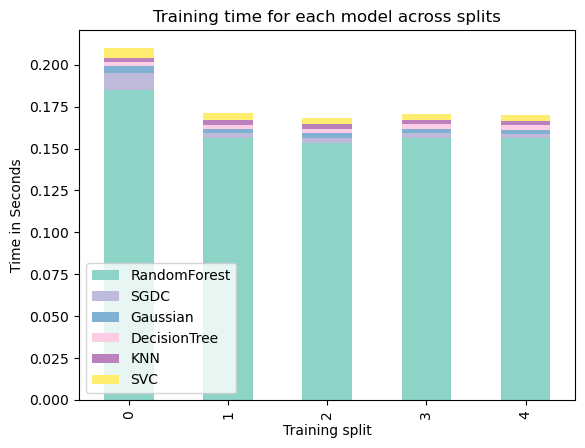

In [6]:
ordered = []

for i in range(len(fits[0])):
	row = []
	for j in range(len(fits)):
		row.append(fits[j][i])
	ordered.append(row)

columns = []
for i in range(len(tn)):
	columns.append(tn[i])
df =  pd.DataFrame(ordered, columns=columns)

df.plot(kind='bar', stacked=True, colormap='Set3')# subplots=True, legend=True, figsize=(5,5))
plt.xlabel("Training split")
plt.ylabel("Time in Seconds")
plt.title("Training time for each model across splits")


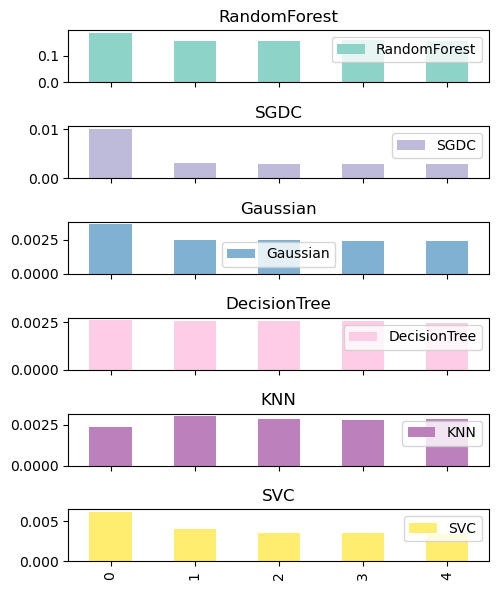

In [7]:
df.plot(kind='bar', colormap='Set3', subplots=True, figsize=(5,6))
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Evaluation time for test data in each split')

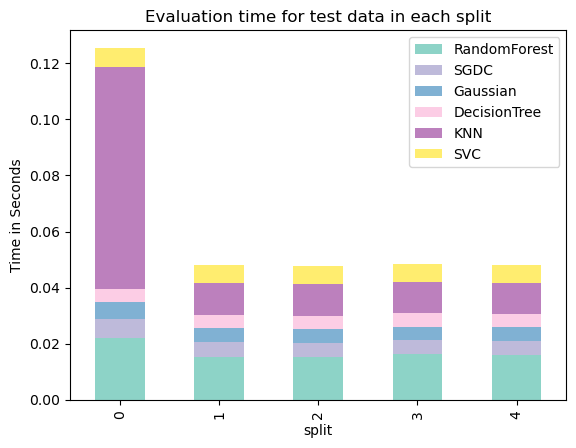

In [8]:
ordered = []

for i in range(len(eval_time[0])):
	row = []
	for j in range(len(eval_time)):
		row.append(eval_time[j][i])
	ordered.append(row)

columns = []
for i in range(len(tn)):
	columns.append(tn[i])
df =  pd.DataFrame(ordered, columns=columns)

df.plot(kind='bar', stacked=True, colormap='Set3')# subplots=True, legend=True, figsize=(5,5))
plt.xlabel("split")
plt.ylabel("Time in Seconds")
plt.title("Evaluation time for test data in each split")


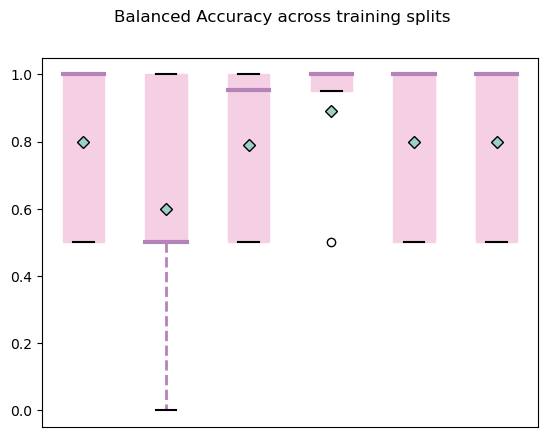

In [9]:
ordered = []

for i in range(len(bal_acc[0])):
	row = []
	for j in range(len(bal_acc)):
		row.append(bal_acc[j][i])
	ordered.append(row)

columns = []
for i in range(len(tn)):
	columns.append(tn[i])

df =  pd.DataFrame(ordered, columns=columns)

boxprops = dict(linestyle='-', linewidth=1, color='#F5CFE4', facecolor= '#F5CFE4')
whiskerprops = {"color": '#B484B9', "linewidth": 2, "linestyle": '--'}
capprops={"color": 'k',  "linewidth": 1.5}
medianprops = {"color": "#B484B9", "linewidth": 3}
meanprops = dict(marker='D', markeredgecolor='black',  markerfacecolor='#9DD1C7')

fig, axs = plt.subplots(1)
fig.suptitle("Balanced Accuracy across training splits")
axs.boxplot(df,patch_artist=True,boxprops = boxprops, whiskerprops=whiskerprops, capprops=capprops,  medianprops=medianprops, meanprops=meanprops, showmeans=True)
axs.set_xticklabels(tn)
axs.set_xticks([])
plt.show()


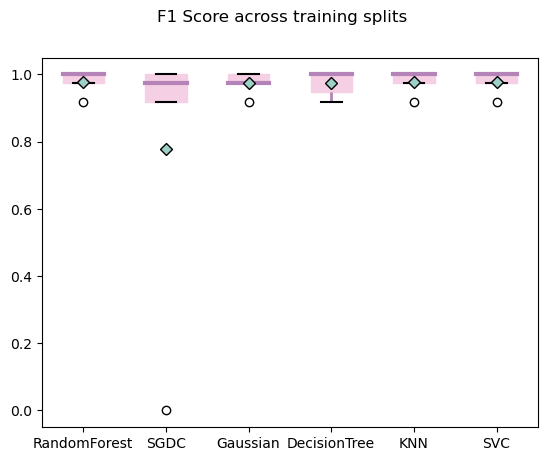

In [10]:
ordered = []

for i in range(len(f1[0])):
	row = []
	for j in range(len(f1)):
		row.append(f1[j][i])
	ordered.append(row)

columns = []
for i in range(len(tn)):
	columns.append(tn[i])

df =  pd.DataFrame(ordered, columns=columns)

boxprops = dict(linestyle='-', linewidth=1, color='#F5CFE4', facecolor= '#F5CFE4')
whiskerprops = {"color": '#B484B9', "linewidth": 2, "linestyle": '--'}
capprops={"color": 'k',  "linewidth": 1.5}
medianprops = {"color": "#B484B9", "linewidth": 3}
meanprops = dict(marker='D', markeredgecolor='black',  markerfacecolor='#9DD1C7')

fig, axs = plt.subplots(1)
fig.suptitle("F1 Score across training splits")
axs.boxplot(df,patch_artist=True,boxprops = boxprops, whiskerprops=whiskerprops, capprops=capprops,  medianprops=medianprops, meanprops=meanprops, showmeans=True)
axs.set_xticklabels(tn)
#axs.set_xticks()
plt.show()


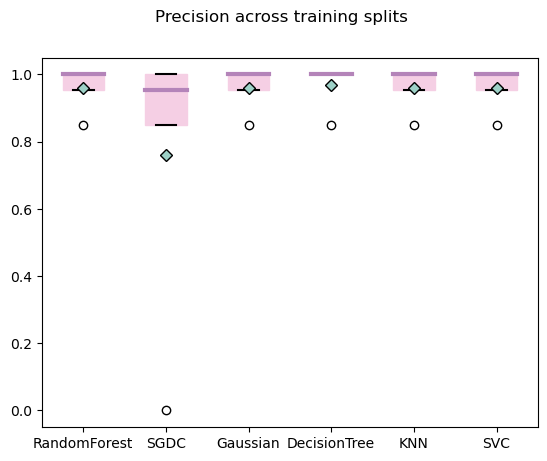

In [11]:
ordered = []

for i in range(len(prec[0])):
	row = []
	for j in range(len(prec)):
		row.append(prec[j][i])
	ordered.append(row)

columns = []
for i in range(len(tn)):
	columns.append(tn[i])

df =  pd.DataFrame(ordered, columns=columns)

boxprops = dict(linestyle='-', linewidth=1, color='#F5CFE4', facecolor= '#F5CFE4')
whiskerprops = {"color": '#B484B9', "linewidth": 2, "linestyle": '--'}
capprops={"color": 'k',  "linewidth": 1.5}
medianprops = {"color": "#B484B9", "linewidth": 3}
meanprops = dict(marker='D', markeredgecolor='black',  markerfacecolor='#9DD1C7')

fig, axs = plt.subplots(1)
fig.suptitle("Precision across training splits")
axs.boxplot(df,patch_artist=True,boxprops = boxprops, whiskerprops=whiskerprops, capprops=capprops,  medianprops=medianprops, meanprops=meanprops, showmeans=True)
axs.set_xticklabels(tn)
#axs.set_xticks([])
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

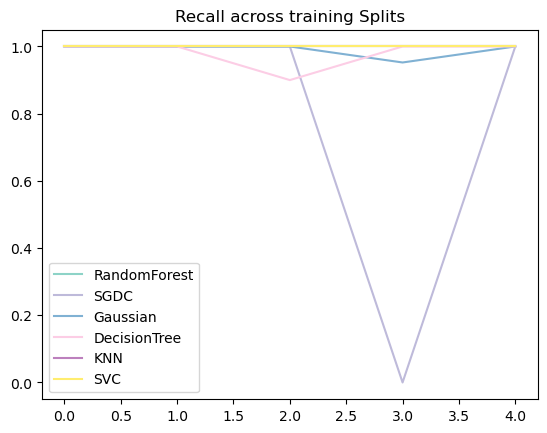

In [12]:
ordered = []

for i in range(len(recall[0])):
	row = []
	for j in range(len(recall)):
		row.append(recall[j][i])
	ordered.append(row)

columns = []
for i in range(len(tn)):
	columns.append(tn[i])

df =  pd.DataFrame(ordered, columns=columns)

df.plot(colormap='Set3')
#plt.plot(df, colormap='Tab3')
plt.title("Recall across training Splits")
plt.show

### Optimisation Graphs

In [17]:
ofits = []
oeval_time = []
obal_acc = []
of1 = []
oprec = []
orecall = []

for i in range(len(opr)):
	ofits.append(opr[i]['fit_time'])
	oeval_time.append(opr[i]['score_time'])
	obal_acc.append(opr[i]['test_balanced_accuracy'])
	of1.append(opr[i]['test_f1'])
	oprec.append(opr[i]['test_precision'])
	orecall.append(opr[i]['test_recall'])

In [21]:
import itertools

original_values = []
ordered_optimised = []
ordered = []

for name in on:
	train_id = tn.index(name)
	original_values.append(tr[i]['test_f1'])

for i in range(len(original_values[0])):
	row = []
	for j in range(len(original_values)):
		row.append(original_values[j][i])
	ordered.append(row)

for i in range(len(of1[0])):
	row = []
	for j in range(len(of1)):
		row.append(of1[j][i])
	ordered_optimised.append(row)

print(len(ordered))
print(len(ordered_optimised))
ordered = list(itertools.chain.from_iterable(zip(ordered, ordered_optimised)))


print(ordered)
columns = []
for i in range(len(on)):
	columns.append(tn[i])
	columns.append("optimised")
df =  pd.DataFrame(ordered , columns=columns)

print(df.head(10))
df.plot(colormap='Set3')
#plt.plot(df, colormap='Tab3')
plt.title("Recall across training Splits")
plt.show
#axs.set_xticks([])
plt.show()

5
5
[[1.0, 1.0, 1.0], [0.975609756097561, 0.975609756097561, 0.975609756097561], [1.0, 1.0, 1.0], [0.975609756097561, 0.975609756097561, 0.975609756097561], [0.975609756097561, 0.975609756097561, 0.975609756097561], [0.975609756097561, 0.975609756097561, 0.975609756097561], [0.975609756097561, 0.975609756097561, 0.975609756097561], [0.975609756097561, 0.975609756097561, 0.975609756097561], [0.9189189189189189, 0.9189189189189189, 0.9189189189189189], [1.0, 1.0, 1.0]]


ValueError: 6 columns passed, passed data had 3 columns